In [1]:
import pandas as pd

# Load and explore the dataset

In [3]:
df = pd.read_csv('watson_healthcare_modified.csv')

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head()

,EmployeeID,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,Shift,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1313919,41,No,Travel_Rarely,1102,Cardiology,1,2,Life Sciences,1,2,Female,94,3,2,Nurse,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,1200302,49,No,Travel_Frequently,279,Maternity,8,1,Life Sciences,1,3,Male,61,2,2,Other,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,1060315,37,Yes,Travel_Rarely,1373,Maternity,2,2,Other,1,4,Male,92,2,1,Nurse,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,1272912,33,No,Travel_Frequently,1392,Maternity,3,4,Life Sciences,1,4,Female,56,3,1,Other,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,1414939,27,No,Travel_Rarely,591,Maternity,2,1,Medical,1,1,Male,40,3,1,Nurse,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
df.shape

(1676, 35)

In [7]:
df.isna().sum()

EmployeeID                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
Shift                       0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
df.dtypes

EmployeeID                   int64
Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
Shift                        int64
TotalWorkingYears   

In [9]:
cat_cols = [x for x in df.columns if df[x].dtype == 'object']

In [10]:
cat_cols

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [11]:
for i in cat_cols:
    print(i)
    print(df[i].unique())

Attrition
['No' 'Yes']
BusinessTravel
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department
['Cardiology' 'Maternity' 'Neurology']
EducationField
['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Gender
['Female' 'Male']
JobRole
['Nurse' 'Other' 'Therapist' 'Administrative' 'Admin']
MaritalStatus
['Single' 'Married' 'Divorced']
Over18
['Y']
OverTime
['Yes' 'No']


In [12]:
df['Attrition'].value_counts()

Attrition
No     1477
Yes     199
Name: count, dtype: int64

In [13]:
df.drop('Over18',axis=1,inplace=True)

In [14]:
df.drop('EmployeeID',axis=1,inplace=True)

In [15]:
df.drop('EmployeeCount',axis=1,inplace=True)

In [16]:
num_cols = [x for x in df.columns if df[x].dtype != 'object']

In [17]:
num_cols

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'Shift',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [18]:
num_features = ['Age','DailyRate','DistanceFromHome','HourlyRate','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','StandardHours','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [19]:
cat_num_cols = [x for x in num_cols if x not in num_features]

In [20]:
cat_num_cols

['Education',
 'EnvironmentSatisfaction',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'Shift',
 'WorkLifeBalance']

In [21]:
len(num_features)

15

# Exploratory Data Analysis (EDA)

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

### Take a quick look at the numerical variable distributions

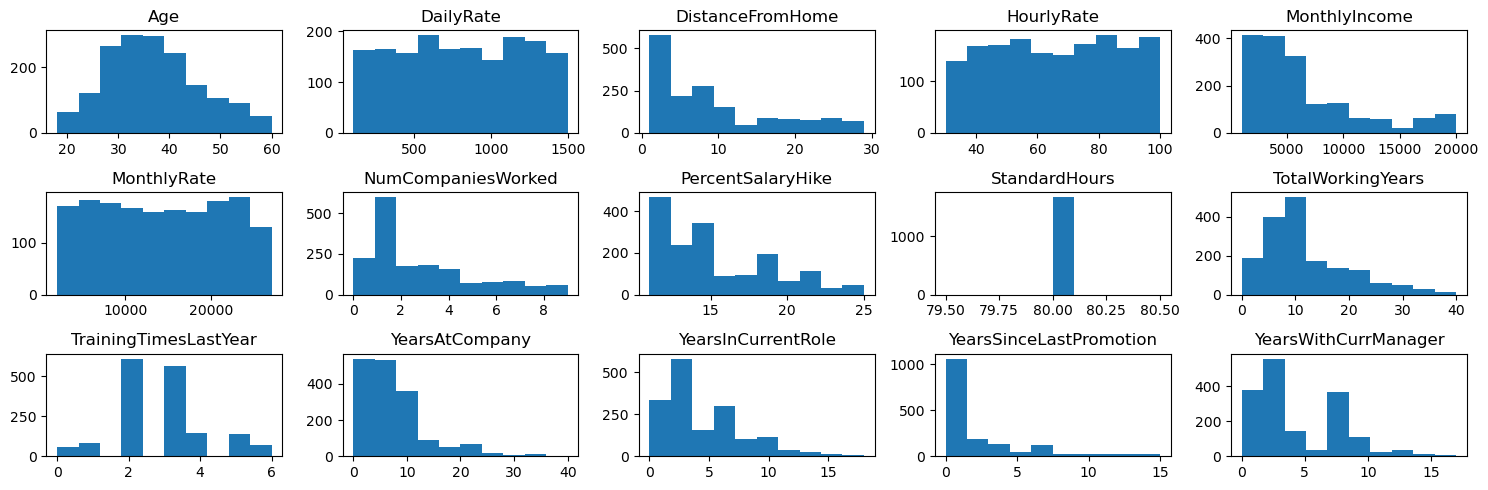

In [25]:
count = 1
plt.figure(figsize=(15,5))

for i in num_features:
    plt.subplot(3,5,count)
    plt.hist(df[i])
    plt.title(i)
    count += 1
    
plt.tight_layout()
plt.show()

In [26]:
df['StandardHours'].value_counts()

StandardHours
80    1676
Name: count, dtype: int64

Since this is a constant value for all the individuals in the dataset, the variable proceed to be removed from the dataset

In [28]:
df.drop('StandardHours',axis=1,inplace=True)

In [29]:
num_features.remove('StandardHours')

In [30]:
plt.style.use('ggplot')

In [31]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Univariate Analysis

Text(0.5, 1.0, 'Age')

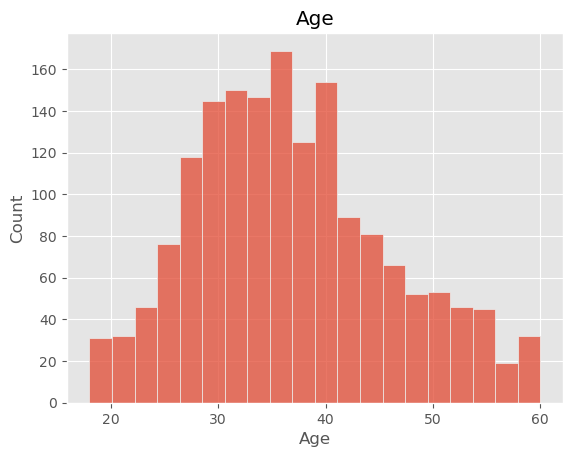

In [33]:
sns.histplot(x='Age',data=df)
plt.title('Age')

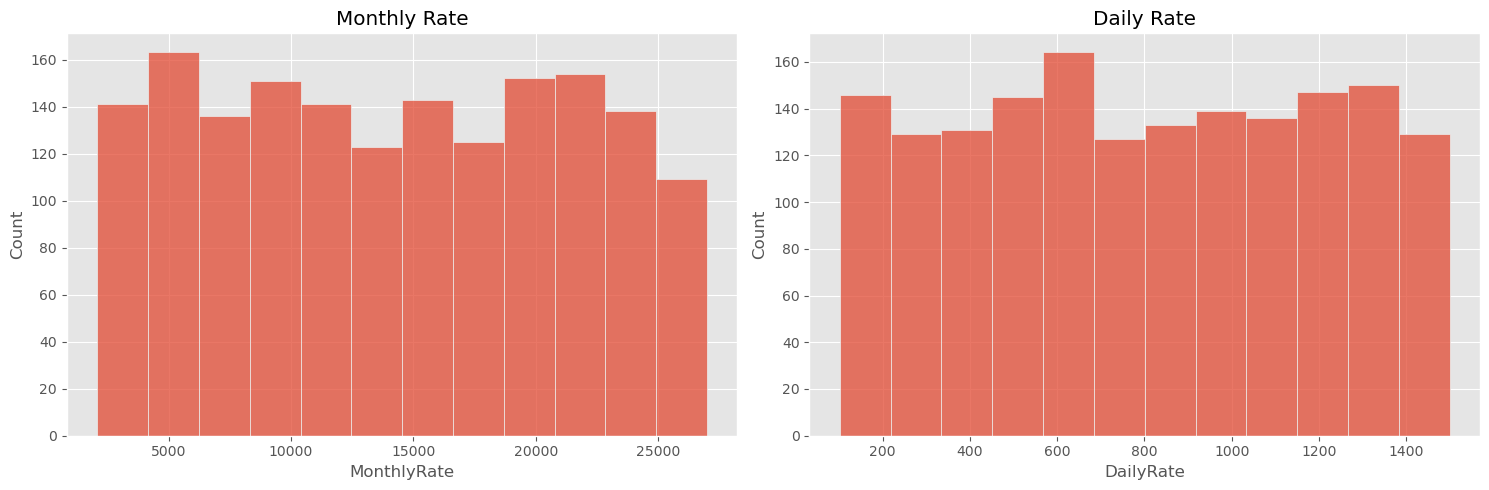

In [34]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.histplot(df['MonthlyRate'])
plt.title('Monthly Rate')

plt.subplot(1,2,2)
sns.histplot(df['DailyRate'])
plt.title('Daily Rate')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Monthly Income')

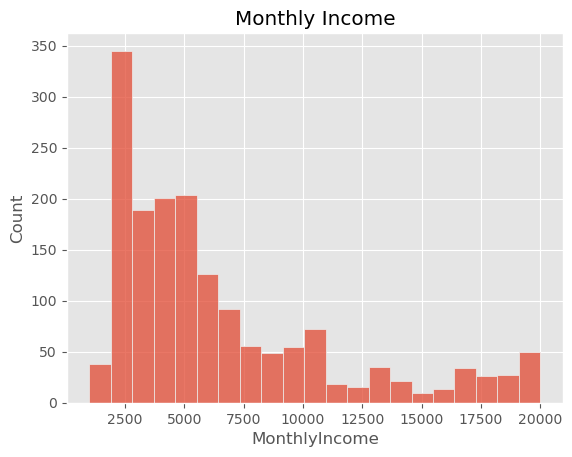

In [35]:
sns.histplot(df['MonthlyIncome'])
plt.title('Monthly Income')

Text(0.5, 1.0, 'Total Working Years')

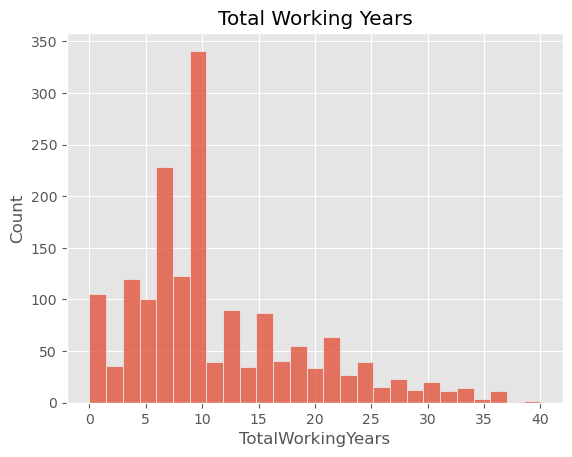

In [36]:
sns.histplot(df['TotalWorkingYears'])
plt.title('Total Working Years')

Text(0.5, 1.0, 'Years in current role')

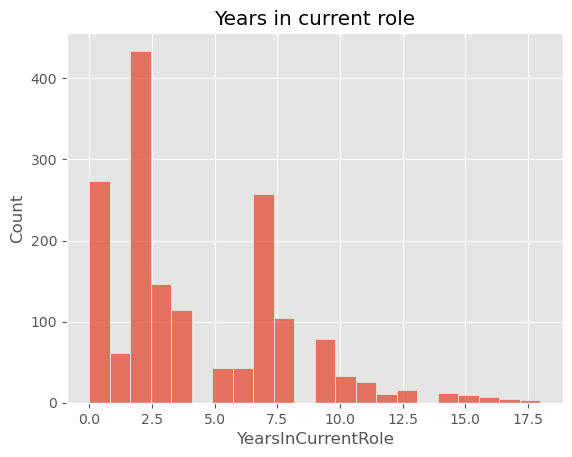

In [37]:
sns.histplot(df['YearsInCurrentRole'])
plt.title('Years in current role')

Text(0.5, 1.0, 'Distance from home')

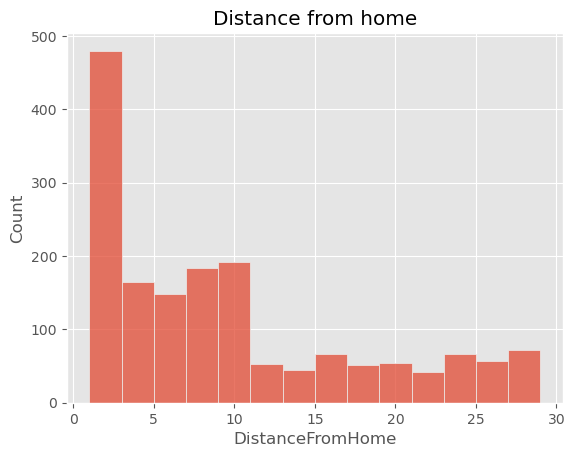

In [38]:
sns.histplot(df['DistanceFromHome'])
plt.title('Distance from home')

Text(0.5, 1.0, 'Distribution of Employees by Business Travel Frequency')

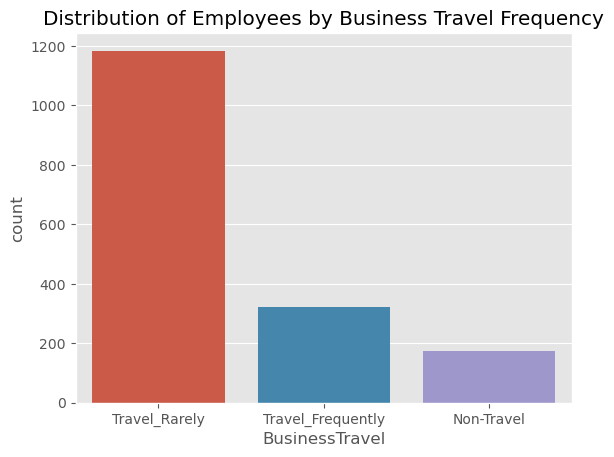

In [39]:
sns.countplot(data=df,x='BusinessTravel')
plt.title('Distribution of Employees by Business Travel Frequency')

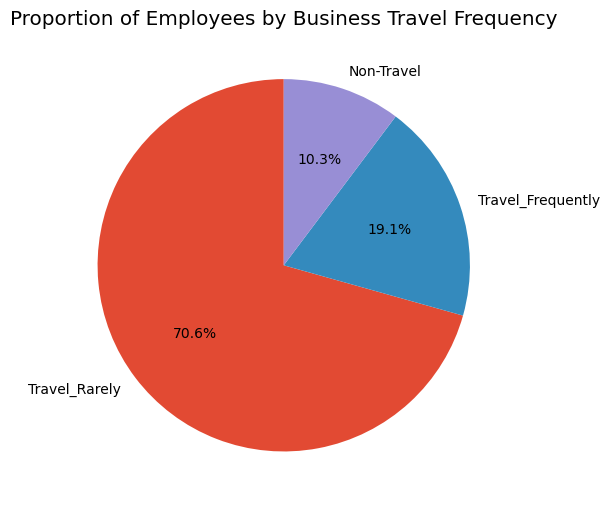

In [40]:
bt_counts = df['BusinessTravel'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bt_counts, labels=bt_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees by Business Travel Frequency')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of Employees by Department')

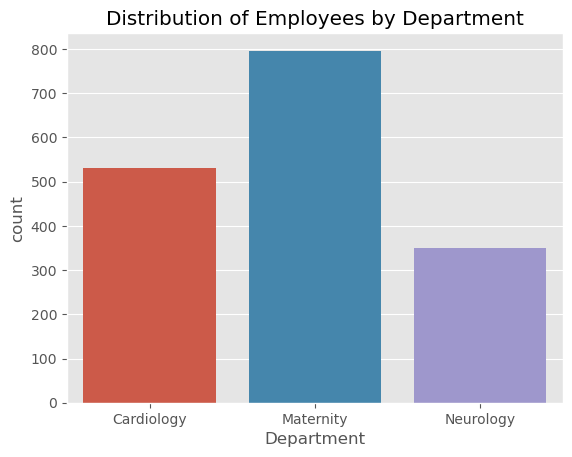

In [41]:
sns.countplot(data=df,x='Department')
plt.title('Distribution of Employees by Department')

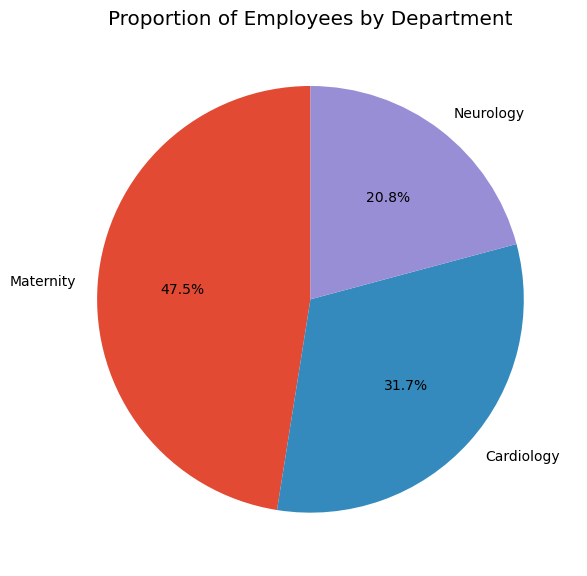

In [42]:
bt_counts = df['Department'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bt_counts, labels=bt_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees by Department')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of employees by Education field')

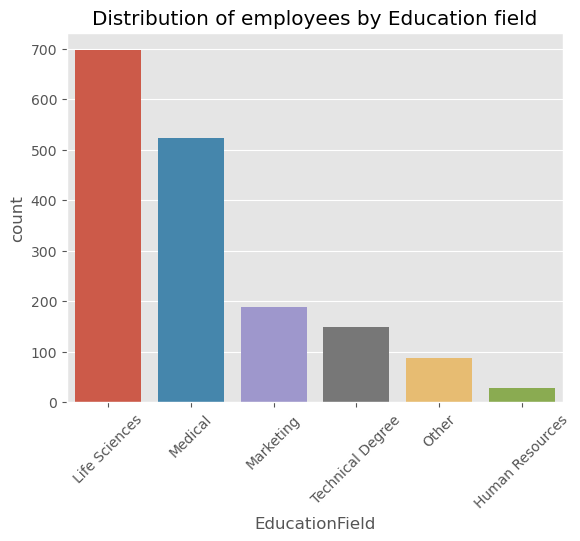

In [43]:
sns.countplot(data=df,x='EducationField',order=df['EducationField'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of employees by Education field')

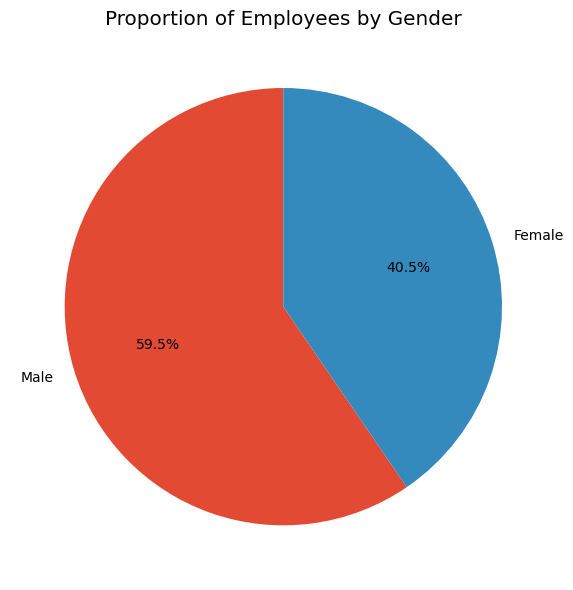

In [44]:
bt_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bt_counts, labels=bt_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees by Gender')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Distribution of employees by Job role')

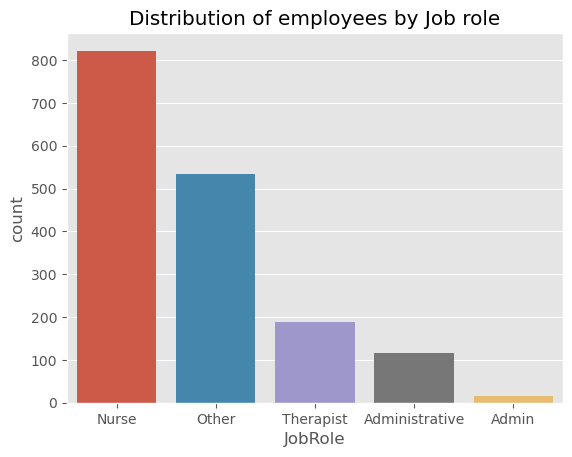

In [45]:
sns.countplot(data=df,x='JobRole')
plt.title('Distribution of employees by Job role')

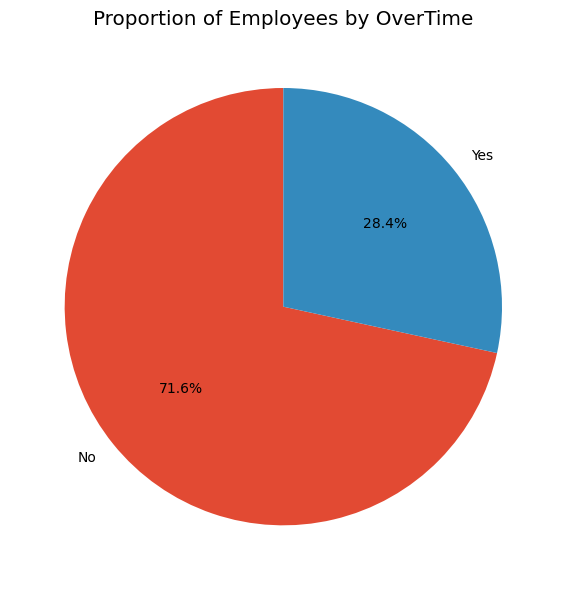

In [46]:
bt_counts = df['OverTime'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(bt_counts, labels=bt_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees by OverTime')
plt.tight_layout()
plt.show()

## Bivariate Analysis

Text(0.5, 1.0, 'Attrition by Age')

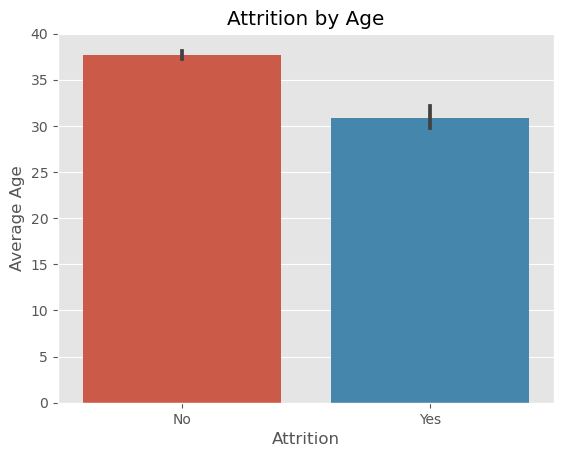

In [48]:
sns.barplot(data=df,x='Attrition',y='Age', estimator = 'mean')
plt.ylabel('Average Age')
plt.title('Attrition by Age')

Text(0.5, 1.0, 'Attrition by Monthly Income')

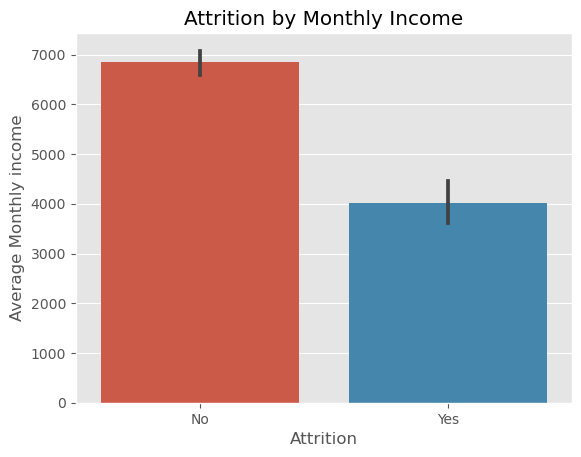

In [49]:
sns.barplot(data=df,x='Attrition',y='MonthlyIncome',estimator='mean')
plt.ylabel('Average Monthly income')
plt.title('Attrition by Monthly Income')

Text(0.5, 1.0, 'Attrition by years at company')

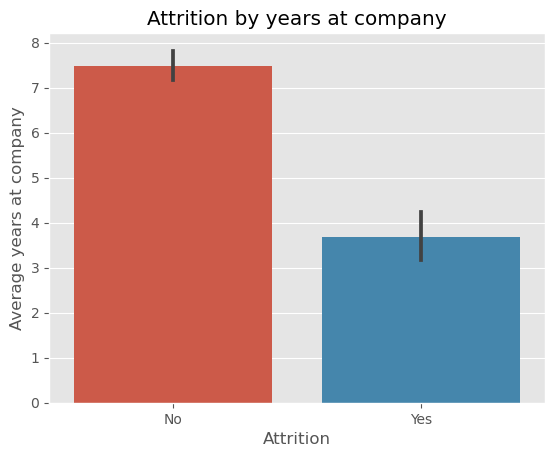

In [50]:
sns.barplot(data=df,x='Attrition',y='YearsAtCompany',estimator='mean')
plt.ylabel('Average years at company')
plt.title('Attrition by years at company')

In [51]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'Shift', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

Text(0.5, 1.0, 'Attrition by Distance from home')

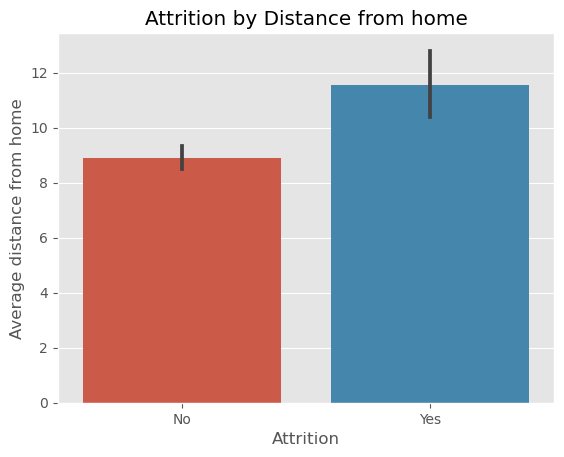

In [52]:
sns.barplot(data=df,x='Attrition',y='DistanceFromHome',estimator='mean')
plt.ylabel('Average distance from home')
plt.title('Attrition by Distance from home')

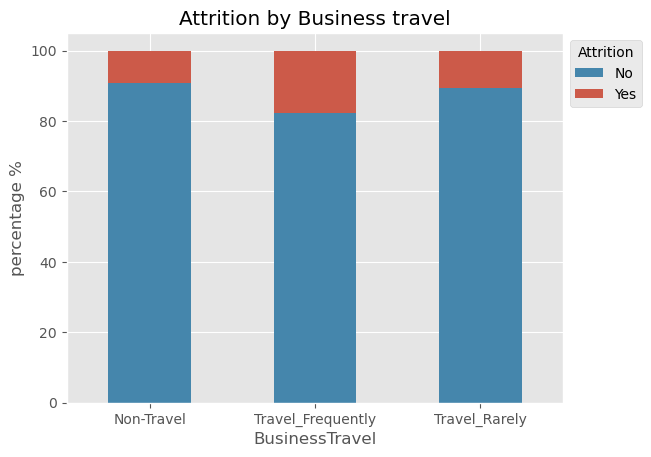

In [53]:
(pd.crosstab(df['BusinessTravel'],df['Attrition'],normalize='index')*100).plot(kind='bar',stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by Business travel')
plt.show()

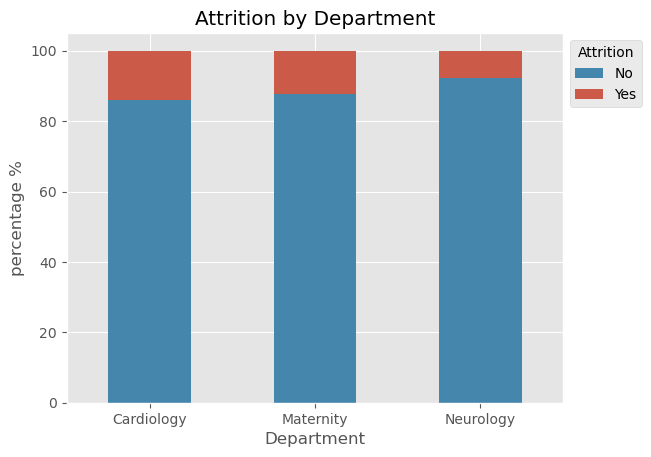

In [54]:
(pd.crosstab(df['Department'],df['Attrition'],normalize='index')*100).plot(kind='bar', stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by Department')
plt.show()

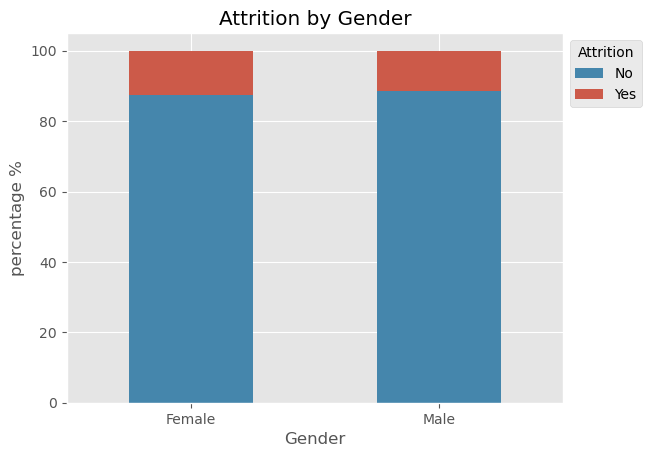

In [55]:
(pd.crosstab(df['Gender'],df['Attrition'],normalize='index')*100).plot(kind='bar', stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by Gender')
plt.show()

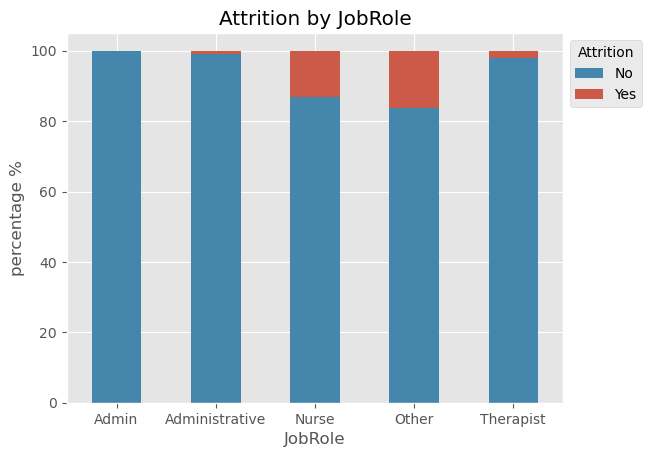

In [56]:
(pd.crosstab(df['JobRole'],df['Attrition'],normalize='index')*100).plot(kind='bar', stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by JobRole')
plt.show()

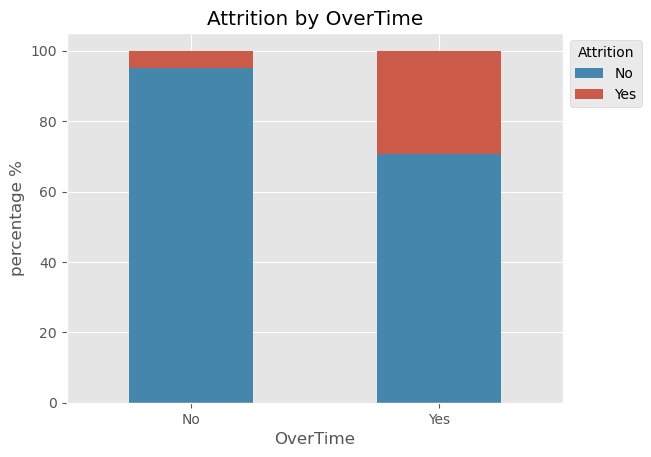

In [57]:
(pd.crosstab(df['OverTime'],df['Attrition'],normalize='index')*100).plot(kind='bar', stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by OverTime')
plt.show()

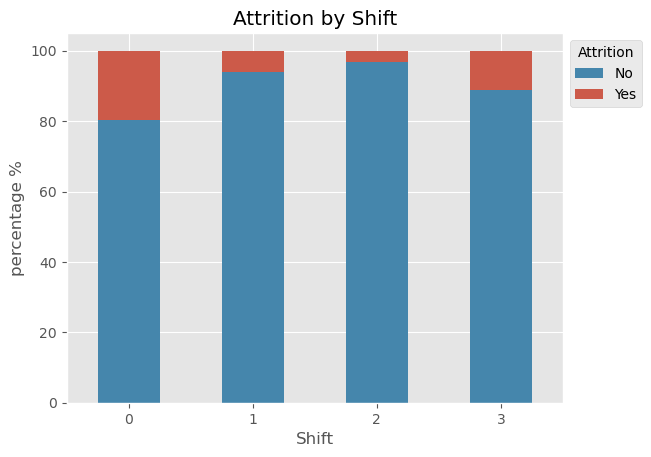

In [58]:
(pd.crosstab(df['Shift'],df['Attrition'],normalize='index')*100).plot(kind='bar', stacked=True,color=['#4586AC', '#CC5A49'])
plt.ylabel('percentage %')
plt.legend(bbox_to_anchor=(1,1),title='Attrition')
plt.xticks(rotation=360)
plt.title('Attrition by Shift')
plt.show()

# Model Building

In [60]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,RandomizedSearchCV
from sklearn.metrics import confusion_matrix,classification_report,auc,precision_recall_curve
from sklearn.preprocessing import OneHotEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTENC

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

In [61]:
x = df.drop('Attrition',axis=1)
y = df['Attrition']

#### Train test split

In [63]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

#### Handle class imbalance

In [67]:
cat_cols.remove('Attrition')

In [68]:
cat_cols.remove('Over18')

In [95]:
cat_features = list(cat_cols) + list(cat_num_cols)

In [96]:
smote = SMOTENC(categorical_features=cat_features)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)

In [97]:
y_train_sm.value_counts()

Attrition
No     1188
Yes    1188
Name: count, dtype: int64

In [98]:
cat_transformer = Pipeline([
    ('encode',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

In [99]:
num_transformer = Pipeline([
    ('scale',MinMaxScaler())
])

In [100]:
pipeline = ColumnTransformer([
    ('cat',cat_transformer,cat_cols),
    ('num',num_transformer,num_features)
],remainder='passthrough')

In [101]:
X_train_sm_preped = pipeline.fit_transform(X_train_sm)
X_test_preped = pipeline.fit_transform(X_test)

In [102]:
y_train_sm_preped = y_train_sm.apply(lambda x: 1 if x == 'Yes' else 0)
y_test_preped = y_test.apply(lambda x: 1 if x == 'Yes' else 0)

In [103]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),KNeighborsClassifier(),XGBClassifier()]

In [104]:
import numpy as np

In [105]:
scores = []

for model in models:
    model.fit(X_train_sm_preped,y_train_sm_preped)
    score = model.score(X_test_preped,y_test_preped)
    score = np.round(score,3)
    scores.append({
        'model':model,
        'score':score,
    })
    
pd.DataFrame(scores)

,model,score
0,LogisticRegression(),0.902
1,DecisionTreeClassifier(),0.830
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.878
3,SVC(),0.890
4,KNeighborsClassifier(),0.768
5,"XGBClassifier(base_score=None, booster=None, c...",0.893


#### Hyperparameter tuninig

In [107]:
clf_xgb = RandomizedSearchCV(XGBClassifier(),
    {
    'max_depth': [3, 5, 7],                         
    'learning_rate': [0.01, 0.1, 0.2],              
    'subsample': [0.6, 0.8, 1.0],                   
    'colsample_bytree': [0.6, 0.8, 1.0],            
    'gamma': [0, 0.1, 0.2],                         
    'reg_alpha': [0, 0.01, 0.1],                  
    'reg_lambda': [1, 1.5, 2.0]                    
},cv=5,n_jobs=-1,n_iter=10)

In [120]:
clf_xgb.fit(X_train_sm_preped,y_train_sm_preped)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           feature_weights=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constrain...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.6, 0.8, 1.0],
                                        'gamma': [0, 0.1, 0.2],
                                        'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [3, 5, 7],
                                        'reg_alpha': [0, 0.01, 0.1],
                                        'reg_lambda': [1, 1.5, 2.0],
                                        'subsample': [0.6, 0.8, 1.0]})

In [121]:
clf_xgb.best_score_

0.959204776647501

In [122]:
clf_xgb.best_params_

{'subsample': 0.6,
 'reg_lambda': 2.0,
 'reg_alpha': 0,
 'max_depth': 5,
 'learning_rate': 0.2,
 'gamma': 0,
 'colsample_bytree': 0.6}

In [171]:
model_xgb = XGBClassifier(
    subsample = 0.6,
    reg_lambda = 2,
    reg_alpha = 0,
    max_depth = 5,
    learning_rate = 0.2,
    gamma = 0,
    colsample_bytree = 0.6
)

model_xgb.fit(X_train_sm_preped,y_train_sm_preped)
model_xgb.score(X_test_preped,y_test_preped)

0.8988095238095238

In [173]:
y_pred_xgb = model_xgb.predict(X_test_preped)

In [175]:
print(classification_report(y_test_preped,y_pred_xgb))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       289
           1       0.66      0.57      0.61        47

    accuracy                           0.90       336
   macro avg       0.80      0.76      0.78       336
weighted avg       0.89      0.90      0.90       336



In [126]:
clf_logistic = GridSearchCV(LogisticRegression(),param_grid={
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    'penalty': ['l2']
},cv=5,n_jobs=-1)

In [127]:
clf_logistic.fit(X_train_sm_preped,y_train_sm_preped)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l2'],
                         'solver': ['liblinear', 'lbfgs']})

In [128]:
clf_logistic.best_score_

0.9293224237063246

In [129]:
clf_logistic.best_params_

{'C': 1, 'penalty': 'l2', 'solver': 'lbfgs'}

In [130]:
model_logistic = LogisticRegression(max_iter=1000,C=1, penalty='l2',solver='liblinear')
model_logistic.fit(X_train_sm_preped,y_train_sm_preped)
model_logistic.score(X_test_preped,y_test_preped)

0.8958333333333334

In [131]:
y_pred_logistic = model_logistic.predict(X_test_preped)

In [132]:
print(classification_report(y_test_preped,y_pred_logistic))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       289
           1       0.61      0.70      0.65        47

    accuracy                           0.90       336
   macro avg       0.78      0.81      0.80       336
weighted avg       0.90      0.90      0.90       336



In [133]:
clf_svc = GridSearchCV(SVC(),{
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
},cv=5,n_jobs=-1)

In [134]:
clf_svc.fit(X_train_sm_preped,y_train_sm_preped)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})

In [135]:
clf_svc.best_score_

0.9423706324635118

In [136]:
clf_svc.best_params_

{'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}

In [137]:
model_svc = SVC(C=10,gamma='auto',kernel='rbf',probability=True)
model_svc.fit(X_train_sm_preped,y_train_sm_preped)
model_svc.score(X_test_preped,y_test_preped)

0.8988095238095238

In [138]:
y_pred_svc = model_svc.predict(X_test_preped)

In [139]:
print(classification_report(y_test_preped,y_pred_svc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       289
           1       0.63      0.66      0.65        47

    accuracy                           0.90       336
   macro avg       0.79      0.80      0.79       336
weighted avg       0.90      0.90      0.90       336



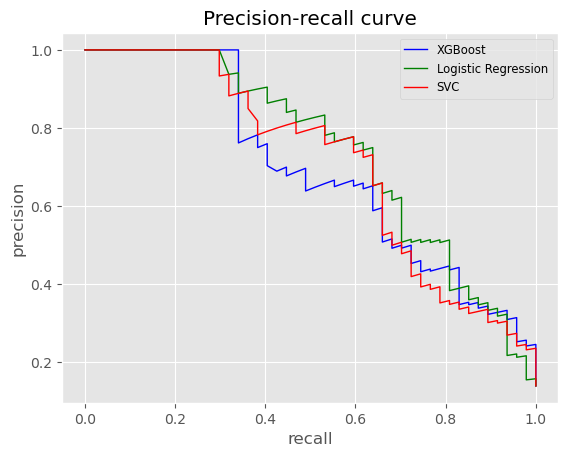

In [140]:
y_proba_xgb = model_xgb.predict_proba(X_test_preped)[:,1]
y_proba_logistic = model_logistic.predict_proba(X_test_preped)[:,1]
y_proba_svc = model_svc.predict_proba(X_test_preped)[:,1]

precision_xgb,recall_xgb,treshold = precision_recall_curve(y_test_preped,y_proba_xgb)
precision_logistic,recall_logistic,threshold = precision_recall_curve(y_test_preped,y_proba_logistic)
precision_svc,recall_svc,threshold = precision_recall_curve(y_test_preped,y_proba_svc)


plt.plot(recall_xgb,precision_xgb,'b-',linewidth = 1,label = 'XGBoost')
plt.plot(recall_logistic,precision_logistic,'g-',linewidth = 1, label = 'Logistic Regression')
plt.plot(recall_svc,precision_svc,'r-',linewidth = 1, label = 'SVC')
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(fontsize = 'small')
plt.title('Precision-recall curve')
plt.show()

In [185]:
print('AUC-PR of XGBoost: ',np.round(auc(recall_xgb,precision_xgb),4))
print('AUC-PR of Logistic Regression: ',np.round(auc(recall_logistic,precision_logistic),4))
print('AUC-PR of SVC: ',np.round(auc(recall_svc,precision_svc),4))

AUC-PR of XGBoost:  0.6908
AUC-PR of Logistic Regression:  0.7382
AUC-PR of SVC:  0.7096


In [187]:
precision, recall, threshold = precision_recall_curve(y_test_preped,y_proba_logistic)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_index = np.argmax(f1_scores)
best_threshold = threshold[best_index]
best_threshold

0.7017415601930463

In [189]:
y_pred_cust = (y_proba_logistic >= 0.78).astype('int')

In [191]:
print(classification_report(y_test_preped,y_pred_cust))

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       289
           1       0.79      0.55      0.65        47

    accuracy                           0.92       336
   macro avg       0.86      0.76      0.80       336
weighted avg       0.91      0.92      0.91       336



In [209]:
transformer_cat_cols = pipeline.named_transformers_['cat'].get_feature_names_out(cat_cols)

In [193]:
model_logistic.intercept_

array([2.72512482])

In [195]:
model_logistic.coef_

array([[ 1.91027444,  0.99351747, -0.78309784, -0.85320126,  0.82345717,
         0.98409365,  0.11088006, -0.66802566,  0.21947946, -0.06376942,
        -0.35715646,  2.0808061 ,  1.65340872, -0.63065024,  0.27084769,
         1.56282159,  4.27154883, -3.14428738, -0.58127116,  2.23309434,
        -0.38487817,  0.22507223,  0.37430403,  1.41370649,  0.15179194,
        -2.98148554, -1.34960465, -1.76061609, -1.99743366,  0.90160401,
        -1.3228943 ,  0.04934044, -0.430909  , -0.7349745 , -1.14764101,
        -0.27373813, -0.1168493 , -0.10041119, -0.88469262, -0.21886939]])

In [211]:
all_features = list(transformer_cat_cols) + list(num_features) + list(cat_num_cols)

In [223]:
coefficients = pd.DataFrame({
    'Feature':all_features,
    'coefficient':model_logistic.coef_.reshape(-1),
    '|coefficient|':abs(model_logistic.coef_.reshape(-1))
})

In [229]:
coefficients.sort_values('|coefficient|',ascending=False)

,Feature,coefficient,|coefficient|
16,OverTime_Yes,4.271549,4.271549
17,Age,-3.144287,3.144287
25,TotalWorkingYears,-2.981486,2.981486
19,DistanceFromHome,2.233094,2.233094
11,JobRole_Nurse,2.080806,2.080806
28,YearsInCurrentRole,-1.997434,1.997434
0,BusinessTravel_Travel_Frequently,1.910274,1.910274
27,YearsAtCompany,-1.760616,1.760616
12,JobRole_Other,1.653409,1.653409
15,MaritalStatus_Single,1.562822,1.562822


<Axes: xlabel='JobRole'>

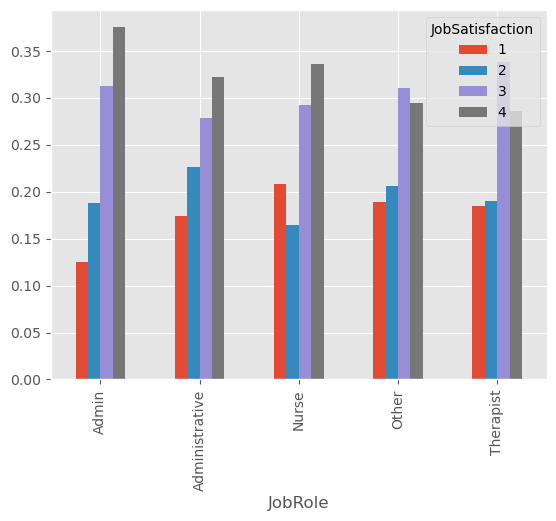

In [233]:
pd.crosstab(df['JobRole'],df['JobSatisfaction'],normalize='index').plot(kind='bar')